# IMB Alltoallv performance comparison

In [11]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [12]:
import sys
sys.path.append('../../../python-modules')

In [13]:
from utilities import filemanip

In [14]:
from synthanalysis import imb

In [15]:
benchmark = "Alltoallv"
systems = ['ARCHER_CrayMPICH',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

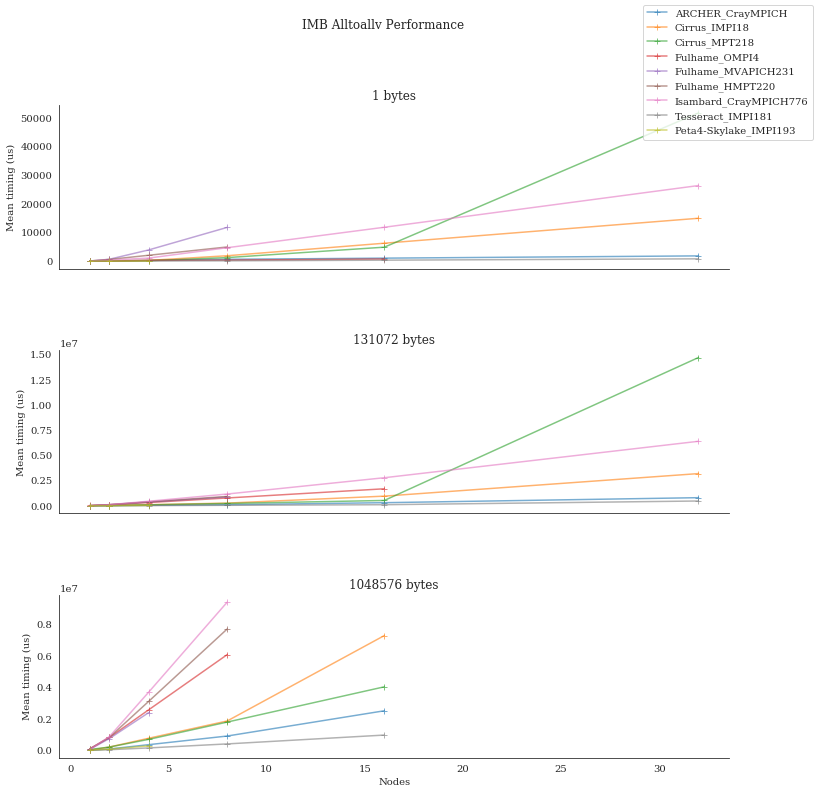

In [16]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
        ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

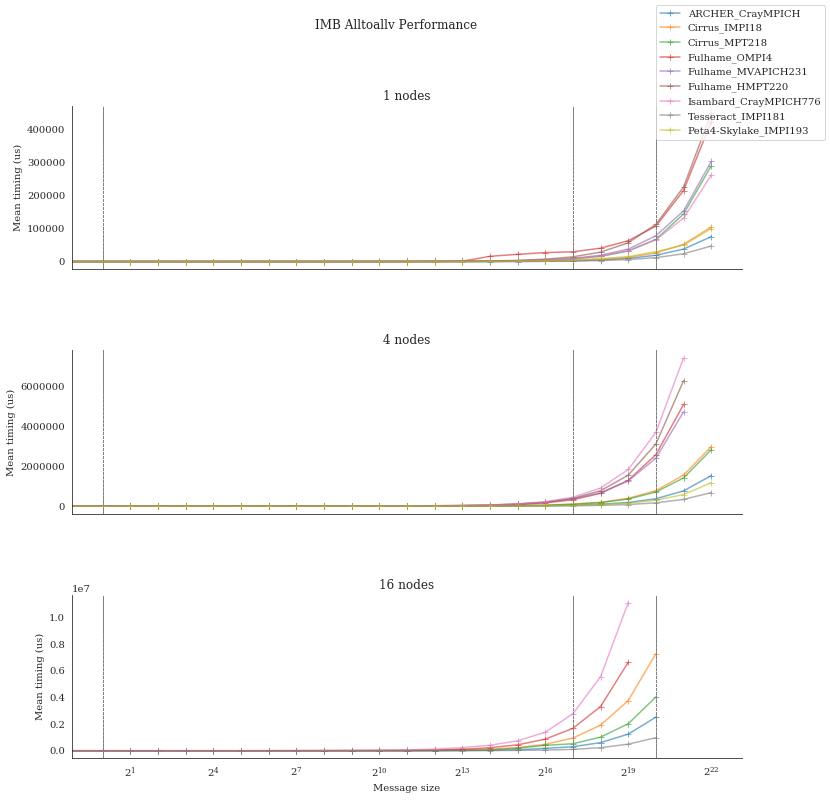

In [17]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_perf[system]), '-+', label=system, alpha=0.6)
        ax.set(title="{0} nodes".format(nodes), ylabel="Mean timing (us)")
        ax.axvline(x=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')

In [18]:
baseline = 'ARCHER_CrayMPICH'
systems = ['Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193']
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)           

IMB Alltoallv performance relative to ARCHER_CrayMPICH
            #nodes
      #bytes         1         4        16
Cirrus_IMPI18
           0      0.48      7.00      8.51
           1      0.51      1.12      0.17
           2      0.51      1.51      0.17
           4      0.50      1.26      0.15
           8      0.50      1.53      0.17
          16      0.50      1.33      0.17
          32      0.49      0.78      0.16
          64      0.54      0.84      0.17
         128      0.46      0.81      0.20
         256      0.49      1.11      0.28
         512      0.43      1.25      0.44
        1024      0.56      1.06      0.68
        2048      0.56      0.82      0.60
        4096      0.60      0.77      0.52
        8192      0.23      0.73      0.41
       16384      0.16      0.54      0.34
       32768      0.07      0.31      0.32
       65536      0.49      0.47      0.37
      131072      0.73      0.42      0.32
      262144      0.73      0.51      0.32
      524

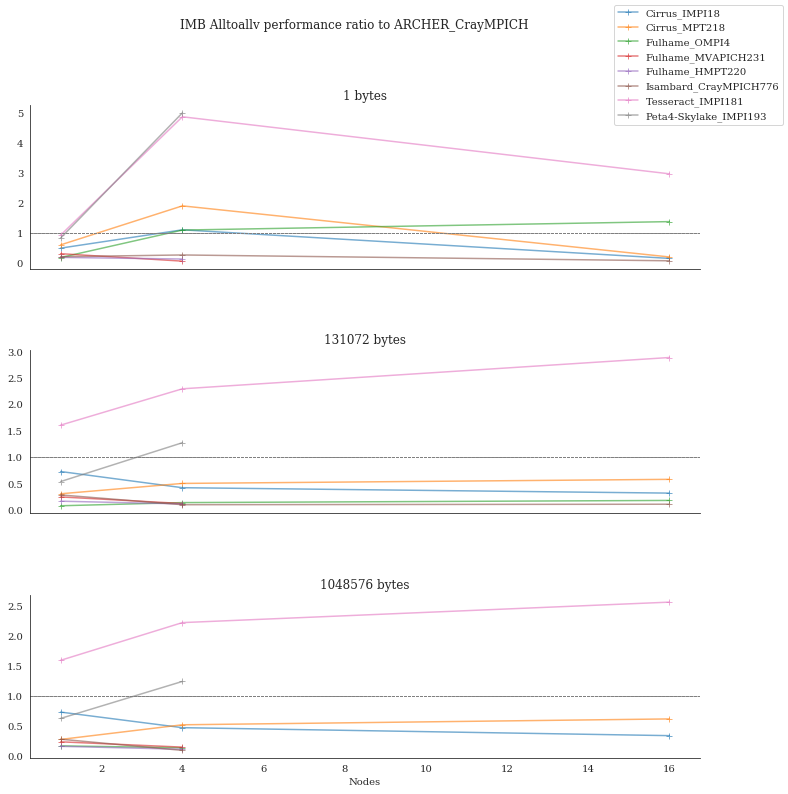

In [19]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
        ax.axhline(y=1, c='gray', ls='--', lw=0.75)
        ax.set(title="{0} bytes".format(size))
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

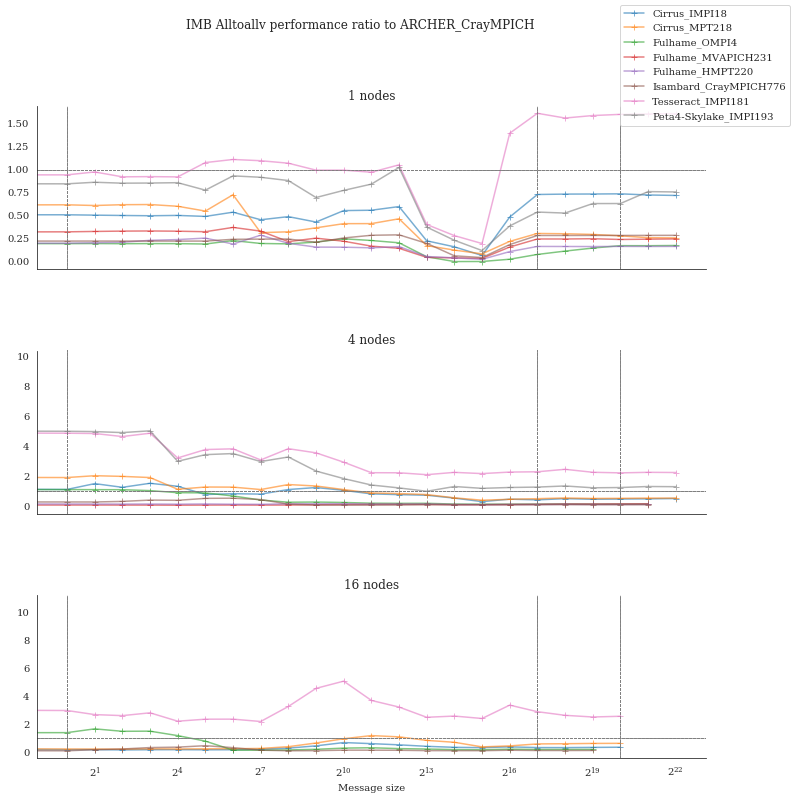

In [20]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio[system]), '-+', label=system, alpha=0.6)
        ax.axhline(y=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1, c='gray', ls='--', lw=0.75)
        ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
        ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
        ax.set(title="{0} nodes".format(nodes))
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')